In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

## SVM  (西瓜书)

$$ \max_{\mathbf{w}, b} \frac{1}{\|\mathbf{w} \|} $$
st.
$$ y_i(\mathbf{w}x_i + b) \geq 1 \quad \text{for all $i$}$$

> 貌似最大化与 b 无关，但实际上通过约束条件起作用。若w的scale过小，则约束条件不满足

### Lagrange Dual Problem

$$ \max L(\alpha, \mathbf{w}, b) = \frac{1}{2} \|w\| ^2 + \sum_i \alpha_i(1 - y_i(\mathbf{w x_i} + b)) $$

对 $L$ 求关于 $w, b$ 的导数，令其等于0

$$ \frac{\partial L}{\partial \mathbf{w}} = ... = 0, \quad \frac{\partial L}{\partial b} = ... = 0$$
 
带入回L，经过一通不太复杂的计算，得到原问题的对偶问题：

$$ \max_\alpha L(\alpha) = \sum_i \alpha_i - \frac{1}{2} \sum_i \sum_z \alpha_i y_i \alpha_z y_z \mathbf{x_i^T x_z}$$
st. 
$$\sum_i y_i \alpha_i = 0$$
$$ \alpha_i > 0 $$

### SMO

// todo

## SVM (Ng)

### Start from Logistic ... 

Logistic Regression Cost Function:

$$ L(\theta) = \sum_i y_i (-log(h_\theta(x_i))) + (1-y_i) (- log(1 - h_\theta(x_i))) $$

where $$h_\theta(x) = Sigmoid(wx+b)$$ ie. y_score

**<u>Modifying Logistic cost funciton we got SVM cost funciton:</u>**

$$ L(\theta) = \sum_i y_i cost_1({\bf \theta^T x}) + (1 - y_i) cost_0({\bf \theta^T x})$$

// todo

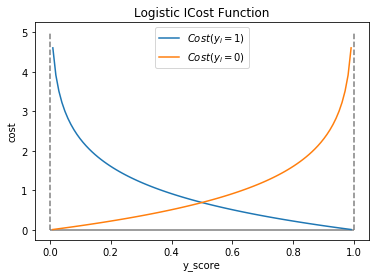

In [27]:
y_score = np.linspace(0.01, 0.99, 100)

cost1 = -np.log(y_score)
cost0 = -np.log(1 - y_score)

plt.plot(y_score, cost1, label=r'$Cost(y_i=1)$')
plt.plot(y_score, cost0, label=r'$Cost(y_i=0)$')
plt.vlines([0.0, 1.0], ymin=0, ymax=5, color='grey', linestyles='dashed')
plt.hlines([0.0], xmin=0.0, xmax=1.0, color='grey')
plt.legend()
plt.xlabel('y_score')
plt.ylabel('cost')
plt.title('Logistic ICost Function')

plt.show()